In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('weight-height.csv')
df.drop(columns=['Gender'], inplace=True)
df = df.head(20)

Text(0, 0.5, 'Height')

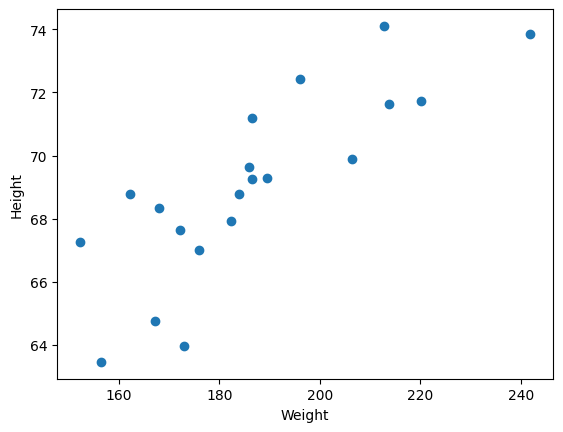

In [8]:
## scatter
plt.scatter(x=df['Weight'], y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
df.corr()

,Height,Weight
Height,1.000000,0.818411
Weight,0.818411,1.000000


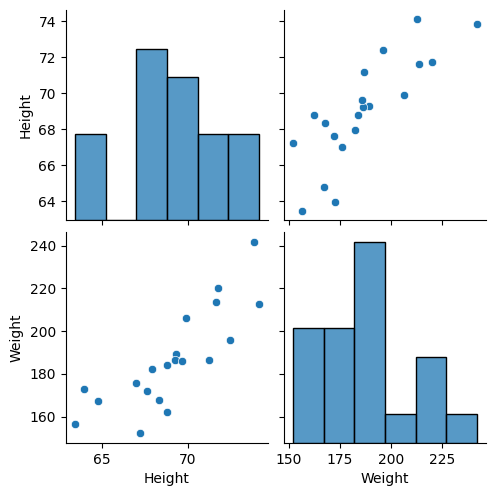

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
## Independent and Dependent features
X = df[['Weight']]
y = df['Height']

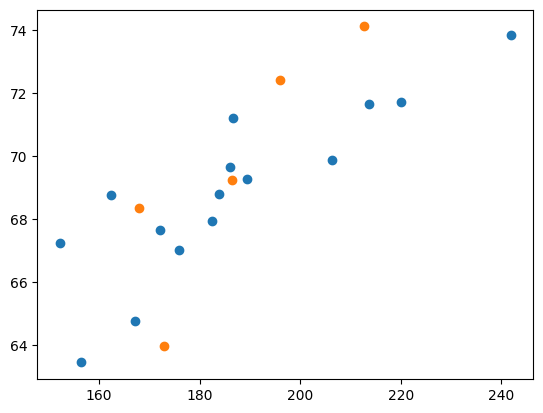

In [12]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=69)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [13]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[-1.94155259e-04],
       [ 3.97721345e-01],
       [-5.62195674e-01],
       [-7.65930836e-01],
       [ 1.09084917e+00]])

In [14]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
# regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [15]:
print(f'Coefficient or Slope : {regression.coef_}')
print(f'Intercept or Bias : {regression.intercept_}')

Coefficient or Slope : [2.23796402]
Intercept or Bias : 68.85750046633866


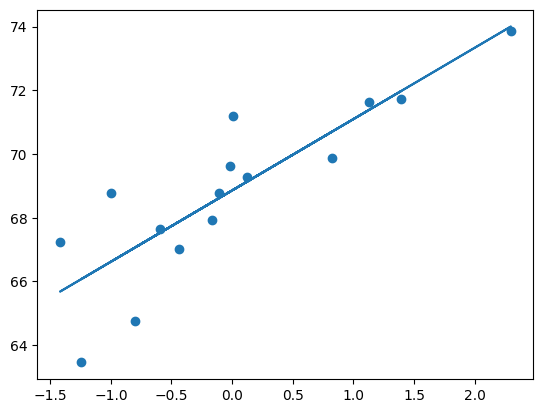

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [17]:
## Prediction for Test data
y_pred = regression.predict(X_test)

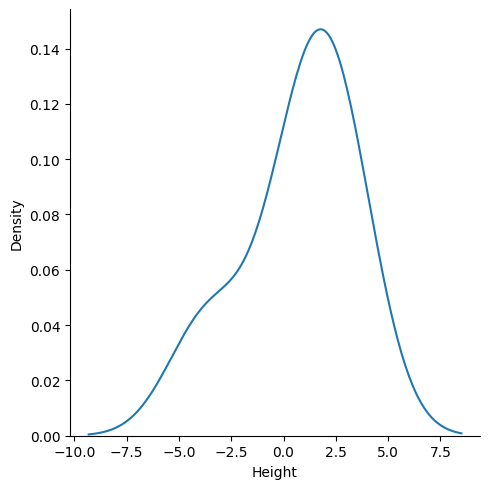

In [18]:
residuals = y_test - y_pred
import seaborn as sns
sns.displot(residuals, kind='kde')

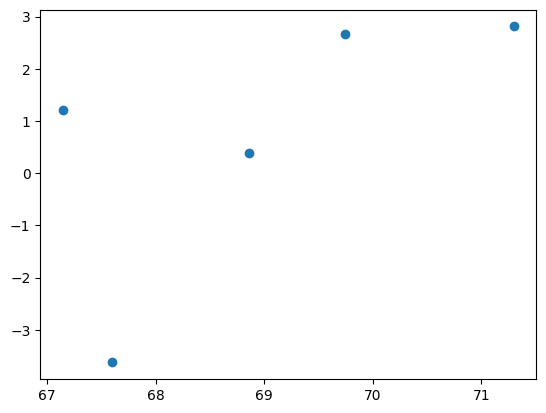

In [19]:
plt.scatter(y_pred, residuals)

In [142]:
## Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'Root Mean Squared Error : {rmse}')


Mean Squared Error : 5.955769607777732
Mean Absolute Error : 2.1397723749729707
Root Mean Squared Error : 2.440444551260637


In [143]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(f'R squared : {score}')

# adjusted R-squared = 1 - (1-R2)(n-1)/(n-k-1), where R2 => R-squared, n => #observations, k => #predictor variables
adjusted = 1 - (1-score)*(len(y_test))/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted R squared : {adjusted}')

R squared : 0.5167615389826579
Adjusted R squared : 0.1946025649710964


In [144]:
# OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [145]:
prediction = model.predict(X_test)
prediction

array([-4.34512483e-04,  8.90086059e-01, -1.25817369e+00, -1.71412565e+00,
        2.44128118e+00])

In [146]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.070
Method:                 Least Squares   F-statistic:                            0.01478
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                       0.905
Time:                        17:37:03   Log-Likelihood:                         -84.768
No. Observations:                  15   AIC:                                      171.5
Df Residuals:                      14   BIC:                                      172.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\Machine Learning\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [129]:
# Prediction for new data
regression.predict(scaler.transform([[80]]))

d:\Machine Learning\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([58.97813391])